# Introduction

**Wrangle data for weratedogs and draw insights.**

In [1]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import matplotlib.pyplot
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

import requests

# Gather Data

Programmatically Download image-predictions in TSV

Use tweepy to download tweets in JSON format

Twitter Archive is provided in csv format


In [2]:
# Use requests library to programmatically download the tsv file
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions-3.tsv', mode = 'wb') as file:
    file.write(response.content)
    #Read image predictions file into dataframe
df_image_predictions = pd.read_csv('image-predictions-3.tsv', sep='\t')

In [3]:
#Read twitter archive file into dataframe
df_twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv')


In [ ]:
# This was taken from "Accessing Project Data Without a Twitter Account" as-is to get tweets in JSON
# DO  NOT Try to run this cell.
#import tweepy for JSON
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [4]:
#Read tweet file into dataframe
df_tweet_json=pd.read_json("tweet-json.txt", lines=True, orient='columns')

# Assess Data

## **ASSESS Tweet JSON**

In [5]:
# view the tweet data
df_tweet_json.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
919,2016-07-22 00:43:32+00:00,756288534030475264,756288534030475264,Here's a heartwarming scene of a single father...,False,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 756288526673649665, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,28519,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1663,2016-01-01 02:29:49+00:00,682750546109968385,682750546109968384,Meet Taco. He's a speckled Garnier Fructis. Lo...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 682750531614445569, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1674,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
81,2017-06-19 16:24:33+00:00,876838120628539392,876838120628539392,This is Ginger. She's having a ruff Monday. To...,False,"[0, 125]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876838110318936065, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,21125,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1431,2016-02-10 16:51:59+00:00,697463031882764288,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40...,False,"[0, 92]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 697463021304750083, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3748,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1231,2016-03-24 01:11:29+00:00,712809025985978368,712809025985978368,This is Stubert. He just arrived. 10/10 https:...,False,"[0, 63]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 712809014606827520, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,20378,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [6]:
# view the tweet datatypes
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

## **ASSESS Twitter Archive**

In [7]:
# View some records
df_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1469,694183373896572928,NaN,NaN,2016-02-01 15:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She realized mid hug that she's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694183373...,9,10,Lola,None,None,None,None
860,763167063695355904,NaN,NaN,2016-08-10 00:16:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Eve. She's a raging alcoho...,6.732953e+17,4.196984e+09,2015-12-06 00:17:55 +0000,https://twitter.com/dog_rates/status/673295268...,8,10,Eve,None,None,pupper,None
1580,687127927494963200,NaN,NaN,2016-01-13 04:23:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gordon. He's an asshole. 9/10 would still...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687127927...,9,10,Gordon,None,None,None,None
2275,667453023279554560,NaN,NaN,2015-11-19 21:22:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,None,None,None,None
689,787717603741622272,NaN,NaN,2016-10-16 18:11:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tonks. She is a service puppo. Can hea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787717603...,13,10,Tonks,None,None,None,puppo


In [8]:
# View dataframe
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
# View numerators
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [10]:
# View denominators
df_twitter_archive.rating_denominator.value_counts()


10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
# View names
df_twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Monty        1
Alf          1
Pavlov       1
Toffee       1
Harnold      1
Name: name, Length: 957, dtype: int64

In [12]:
# View Source
df_twitter_archive.source.value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## **ASSESS Image Predictions**

In [13]:
df_image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1834,836989968035819520,https://pbs.twimg.com/media/C52V7PzWcAA_pVv.jpg,1,shopping_cart,0.572422,False,shopping_basket,0.414002,False,toy_poodle,0.005887,True
2049,887101392804085760,https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg,1,Samoyed,0.733942,True,Eskimo_dog,0.035029,True,Staffordshire_bullterrier,0.029705,True
1924,857263160327368704,https://pbs.twimg.com/media/C-WcS4MXoAADrBU.jpg,1,Samoyed,0.998021,True,Pomeranian,0.000922,True,keeshond,0.000311,True
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
558,677698403548192770,https://pbs.twimg.com/media/CWerGmOXAAAm6NY.jpg,1,Shih-Tzu,0.916645,True,Lhasa,0.057883,True,Pekinese,0.020126,True


In [14]:
# Check to see if p2 or p3 predictions ar ever better than p1
df_image_predictions.query('p1_conf < p2_conf  or p1_conf < p3_conf').head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [15]:
# Check to see if p3 predictions ar ever better than p2
df_image_predictions.query('p2_conf < p3_conf').head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**This means that we can go p1->p2->p3 in order without having to worry about conf scores**

In [16]:
# View data types
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Identified Issues 


###  Tidy Issues 

1) Remove uneeded columns from JSON Tweets.

2) There are multiple dog stages columns in archive.They should be merged into one column.

3) extract source in archive from html

4) Add a numeric rating_num column in order to compare ratings

5) Add a true_dog column  to store the best predicted true dog name in image predictions.

6) Merge all 3 different data sets into one  cleaned data set.


###  Quality Issues

1) convert ID in JSON dataset to object

2) extract character count from display_text_range in JSON dataset

3) Identify all invalid names(starting with lowercase or "None") and convert to nan in Archive dataset.

4) Remove reply and retweeted data from Archive

5) Convert tweet_id to object in Archive

6) Convert timestamp to datetime in Archive

7) Fix bad values in rating_numerator in Archive

8) Fix bad values in rating_denominator in Archive

9) Set tweet_id to object in image predictions

10) Set breed to all lowercase in image predictions

 

# Tidy and Clean


## Make Copies of original sets

In [177]:
# make copies for cleaning
df_tweet_json_clean=df_tweet_json.copy()
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean=df_image_predictions.copy()


**Tidy and CLEAN Tweet JSON**

**Define : Remove unwanted columns from JSON**

**Code: create new df with just the columns we are interested in**

In [178]:
# Code: 'created_at', id, id_str, full_text, favorite_count, retweeted
# create new df with just the columns we are interested in

cols = ['created_at','id','id_str','full_text','favorite_count', 'retweet_count','retweeted','display_text_range']

df_tweet_json_clean = df_tweet_json.query('lang == "en"')[cols]



**Test**

In [179]:
# view a sample of clean data
df_tweet_json_clean.sample(10)

,created_at,id,id_str,full_text,favorite_count,retweet_count,retweeted,display_text_range
1593,2016-01-11 01:25:58+00:00,686358356425093120,686358356425093120,Heartwarming scene here. Son reuniting w fathe...,2398,776,False,"[0, 139]"
1916,2015-12-08 16:56:51+00:00,674271431610523648,674271431610523648,"""AT DAWN, WE RIDE""\n10/10 for both dogs https:...",1682,800,False,"[0, 62]"
1682,2015-12-29 03:33:58+00:00,681679526984871937,681679526984871936,Can you spot Toby the guilty pupper? 7/10 woul...,1923,499,False,"[0, 135]"
2234,2015-11-21 19:50:53+00:00,668154635664932864,668154635664932864,Fun dogs here. Top one clearly an athlete. Bot...,522,336,False,"[0, 139]"
820,2016-08-29 03:00:36+00:00,770093767776997377,770093767776997376,RT @dog_rates: This is just downright precious...,0,3520,False,"[0, 106]"
386,2017-02-01 01:11:25+00:00,826598799820865537,826598799820865536,"I was going to do 007/10, but the joke wasn't ...",5637,292,False,"[0, 69]"
1179,2016-04-11 01:13:34+00:00,719332531645071360,719332531645071360,This is Pippa. She managed to start the car bu...,3711,1078,False,"[0, 140]"
1764,2015-12-20 02:20:55+00:00,678399652199309312,678399652199309312,This made my day. 12/10 please enjoy https://t...,61794,30742,False,"[0, 60]"
513,2016-12-21 17:39:46+00:00,811627233043480576,811627233043480576,This is Augie. He's a savage. Doesn't give a h...,14265,3650,False,"[0, 103]"
1995,2015-12-04 01:40:29+00:00,672591271085670400,672591271085670400,Lots of pups here. All are Judea Hazelnuts. Ex...,782,207,False,"[0, 104]"


**Define : Convert id to Object**

**Code : Converting id to Object**

In [180]:
df_tweet_json_clean['id'] = df_tweet_json_clean.id.astype('object')



**Test**

In [181]:
df_tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2336 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2336 non-null   datetime64[ns, UTC]
 1   id                  2336 non-null   object             
 2   id_str              2336 non-null   int64              
 3   full_text           2336 non-null   object             
 4   favorite_count      2336 non-null   int64              
 5   retweet_count       2336 non-null   int64              
 6   retweeted           2336 non-null   bool               
 7   display_text_range  2336 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 148.3+ KB


**Define: extract character count from display_text_range**

**Code: Get character count and view sample**

In [182]:
# extract character count from display_text_range
df_tweet_json_clean['character_count'] = df_tweet_json_clean.display_text_range.str[1]



**Test**

In [183]:
# view a sample of clean data
df_tweet_json_clean.sample(10)

,created_at,id,id_str,full_text,favorite_count,retweet_count,retweeted,display_text_range,character_count
1243,2016-03-21 01:54:29+00:00,711732680602345472,711732680602345472,I want to hear the joke this dog was just told...,9756,4653,False,"[0, 77]",77
2219,2015-11-22 17:23:57+00:00,668480044826800133,668480044826800128,Say hello to DayZ. She is definitely stuck on ...,491,162,False,"[0, 138]",138
1056,2016-06-12 00:44:30+00:00,741793263812808706,741793263812808704,When your crush won't pay attention to you. Bo...,4982,1698,False,"[0, 64]",64
1153,2016-04-26 15:29:30+00:00,724983749226668032,724983749226668032,This is Fred-Rick. He dabbles in parkour. The ...,4040,1462,False,"[0, 116]",116
1489,2016-01-29 02:17:12+00:00,692894228850999298,692894228850999296,Meet Tupawc. He's actually a Christian rapper....,2511,910,False,"[0, 139]",139
474,2017-01-02 23:23:48+00:00,816062466425819140,816062466425819136,RT @dog_rates: Meet Jack. He's one of the rare...,0,1207,False,"[0, 140]",140
1583,2016-01-12 16:25:26+00:00,686947101016735744,686947101016735744,This is Jackson. He was specifically told not ...,9433,3582,False,"[0, 137]",137
1806,2015-12-15 22:52:02+00:00,676897532954456065,676897532954456064,Exotic handheld dog here. Appears unathletic. ...,2426,817,False,"[0, 138]",138
1284,2016-03-11 21:15:02+00:00,708400866336894977,708400866336894976,RT if you are as ready for summer as this pup ...,17516,11330,False,"[0, 78]",78
915,2016-07-23 19:49:07+00:00,756939218950160384,756939218950160384,This is Jax. He is a majestic mountain pupper....,7342,2295,False,"[0, 112]",112


In [184]:
df_tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2336 entries, 0 to 2353
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2336 non-null   datetime64[ns, UTC]
 1   id                  2336 non-null   object             
 2   id_str              2336 non-null   int64              
 3   full_text           2336 non-null   object             
 4   favorite_count      2336 non-null   int64              
 5   retweet_count       2336 non-null   int64              
 6   retweeted           2336 non-null   bool               
 7   display_text_range  2336 non-null   object             
 8   character_count     2336 non-null   int64              
dtypes: bool(1), datetime64[ns, UTC](1), int64(4), object(3)
memory usage: 166.5+ KB


**Tidy and CLEAN twitter archive**

**Define: convert all invalid names(start with lower case) to Nan**
    
**Code:**

In [185]:
# convert all invalid names(start with lower case to Nan)
# Replace name values that begin with a lowercase character to np.nan
df_twitter_archive_clean['name']=df_twitter_archive_clean['name'].astype(str).apply(lambda
x: "None" if x[0].islower() else x)
df_twitter_archive_clean['name']=df_twitter_archive_clean['name'].astype(str).apply(lambda
x: "None" if (len(x)==1) else x)
df_twitter_archive_clean.name.replace("None", np.nan, inplace=True)


**Test**

In [186]:
# validate
df_twitter_archive_clean.name.value_counts()

Charlie    12
Cooper     11
Oliver     11
Lucy       11
Tucker     10
           ..
Autumn      1
Barry       1
Monty       1
Alf         1
Harnold     1
Name: name, Length: 930, dtype: int64

In [187]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1501 non-null   object 
 13  doggo                       2356 

**Define : Convert timestamp to datetime**

**Code**

In [188]:
# Convert timestamp to datetime
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean.timestamp)

**Test**

In [189]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

**Define :Remove retweets and replies**

**Code**

In [190]:
# Drop reply and retweet records


df_twitter_archive_clean = df_twitter_archive_clean.query('(retweeted_status_id != retweeted_status_id) & (in_reply_to_status_id != in_reply_to_status_id)')


**Test**

In [191]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

**Define : Remove columns that are not needed**

**Code :**

In [192]:

# Drop uneeded columns


archive_cols = ['tweet_id', 'timestamp', 'source', 'text', 
                'expanded_urls', 'rating_numerator','rating_denominator', 
                'name', 'doggo', 'floofer', 'pupper', 'puppo']

df_twitter_archive_clean = df_twitter_archive_clean[archive_cols]


**Test**

In [193]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1389 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

**Define: Convert id to object**

**Code :**

In [194]:
# set tweet_id as object
df_twitter_archive_clean['tweet_id']=df_twitter_archive_clean.tweet_id.astype(object)

**Test**

In [195]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1389 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

**Define : Combine columns doggo, floofer, pupper, and puppo into single column.**

**Code:**

In [198]:
# Create a list of dog columns 
dog_cols = ['doggo', 'floofer', 'pupper', 'puppo']

# Replace None in dog_cols with empty string
df_dog_nms = df_twitter_archive_clean[dog_cols].replace('None', '')
df_twitter_archive_clean['dog_class'] = df_dog_nms.apply(lambda x: ''.join(x), axis=1).replace('^$', np.nan, regex=True)

# Check data
df_twitter_archive_clean.dog_class.value_counts()

pupper          221
doggo            72
puppo            23
doggopupper       9
floofer           9
doggofloofer      1
doggopuppo        1
Name: dog_class, dtype: int64

In [199]:
# Set up replace array to put commas in between dog class
replace_ar={'doggopupper':'doggo, pupper',
             'doggofloofer': 'doggo, floofer',
             'doggopuppo':'doggo, puppo'}
df_twitter_archive_clean['dog_class']=df_twitter_archive_clean.dog_class.replace(replace_ar)
df_twitter_archive_clean.dog_class.value_counts()

pupper            221
doggo              72
puppo              23
doggo, pupper       9
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_class, dtype: int64

In [200]:
# drop dog_cols from archive
df_twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)


**Test**

In [201]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1389 non-null   object             
 8   dog_class           336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 163.8+ KB


**Define : Extract Source from html**

**Code:**


In [202]:
# gather source values
df_twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [203]:
#create replace dictionary
replace_ar = {
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter iPhone',
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine',
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web',
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'
          }
# replace source
df_twitter_archive_clean['source'] = df_twitter_archive_clean.source.replace(replace_ar)

**Test**

In [204]:
# verify as expected
df_twitter_archive_clean.source.value_counts()

Twitter iPhone    1964
Vine                91
Twitter Web         31
TweetDeck           11
Name: source, dtype: int64

**Define : Correct rating numerator, denominator, and add numerator/denominator fraction column for analysis**

**Code:**


In [205]:
# Try to parse the text field to get rating numerator and denominators
# this will require a few itterations
df_twitter_archive_clean.text.str.extract('(\d+(?!\.)(?:\.\d+)?/\d+(?:\.\d+)?0)', expand=True)[0].value_counts()

12/10      486
10/10      437
11/10      413
13/10      287
9/10       153
8/10        98
7/10        51
14/10       39
5/10        34
6/10        32
3/10        19
4/10        15
2/10         9
1/10         4
420/10       1
80/80        1
4/20         1
27/10        1
45/50        1
26/10        1
99/90        1
44/40        1
50/50        1
0/10         1
144/120      1
75/10        1
165/150      1
84/70        1
60/50        1
121/110      1
204/170      1
1776/10      1
88/80        1
Name: 0, dtype: int64

In [206]:
# Extract num/denom fraction into a new column
df_twitter_archive_clean['fraction']=df_twitter_archive_clean.text.str.extract('(\d+(?!\.)(?:\.\d+)?/\d+(?:\.\d+)?0)', expand=True)[0]

# replace numerator for values where we were able to extract fraction
df_twitter_archive_clean['rating_numerator'] = df_twitter_archive_clean.fraction.str.split('/').str[0].astype('float32')

# replace denominator for values where we were able to extract fraction
df_twitter_archive_clean['rating_denominator'] = df_twitter_archive_clean.fraction.str.split('/').str[1].astype('float32')

# verify extrated values match fraction
df_twitter_archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,fraction
37,885167619883638784,2017-07-12 16:03:00+00:00,Twitter iPhone,Here we have a corgi undercover as a malamute....,https://twitter.com/dog_rates/status/885167619...,13.0,10.0,NaN,NaN,13/10
1815,676613908052996102,2015-12-15 04:05:01+00:00,Twitter iPhone,This is the saddest/sweetest/best picture I've...,https://twitter.com/dog_rates/status/676613908...,12.0,10.0,NaN,NaN,12/10
1550,689154315265683456,2016-01-18 18:36:07+00:00,Twitter iPhone,We normally don't rate birds but I feel bad co...,https://twitter.com/dog_rates/status/689154315...,9.0,10.0,NaN,NaN,9/10
1025,746369468511756288,2016-06-24 15:48:42+00:00,Twitter iPhone,This is an Iraqi Speed Kangaroo. It is not a d...,https://twitter.com/dog_rates/status/746369468...,9.0,10.0,NaN,NaN,9/10
1987,672877615439593473,2015-12-04 20:38:19+00:00,Twitter iPhone,This is Oscar. He's getting bombarded with the...,https://twitter.com/dog_rates/status/672877615...,8.0,10.0,Oscar,NaN,8/10
202,853639147608842240,2017-04-16 16:00:07+00:00,Twitter iPhone,A photographer took pictures before and after ...,https://twitter.com/dog_rates/status/853639147...,13.0,10.0,NaN,NaN,13/10
1088,737826014890496000,2016-06-01 02:00:04+00:00,Twitter iPhone,This is Remy. He has some long ass ears (proba...,https://twitter.com/dog_rates/status/737826014...,10.0,10.0,Remy,NaN,10/10
1112,733460102733135873,2016-05-20 00:51:30+00:00,Twitter iPhone,This is Hermione. Her face is as old as time. ...,https://twitter.com/dog_rates/status/733460102...,11.0,10.0,Hermione,NaN,11/10
2204,668636665813057536,2015-11-23 03:46:18+00:00,Twitter iPhone,This is an Irish Rigatoni terrier named Berta....,https://twitter.com/dog_rates/status/668636665...,10.0,10.0,NaN,NaN,10/10
676,789314372632018944,2016-10-21 03:56:25+00:00,Twitter iPhone,HE WAS JUST A LIL SLEEPY FROM BEING SUCH A GOO...,https://twitter.com/sebscat/status/78881832853...,13.0,10.0,NaN,NaN,13/10


In [207]:
# validate types
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2096 non-null   float32            
 6   rating_denominator  2096 non-null   float32            
 7   name                1389 non-null   object             
 8   dog_class           336 non-null    object             
 9   fraction            2096 non-null   object             
dtypes: datetime64[ns, UTC](1), float32(2), object(7)
memory usage: 163.8+ KB


In [208]:
# drop fraction column
df_twitter_archive_clean.drop('fraction', axis=1, inplace=True)

In [209]:
# create rating decimal column
df_twitter_archive_clean['rating_num'] = df_twitter_archive_clean.rating_numerator / df_twitter_archive_clean.rating_denominator


**Test**


In [210]:
# validate data
df_twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,rating_num
1847,675820929667219457,2015-12-12 23:34:00+00:00,Twitter iPhone,Here's a handful of sleepy puppers. All look u...,https://twitter.com/dog_rates/status/675820929...,11.0,10.0,NaN,NaN,1.1
609,797545162159308800,2016-11-12 21:02:38+00:00,Twitter iPhone,This is Cassie. She steals things. Guilt incre...,https://twitter.com/dog_rates/status/797545162...,12.0,10.0,Cassie,NaN,1.2
2282,667211855547486208,2015-11-19 05:24:37+00:00,Twitter iPhone,This is Genevieve. She is a golden retriever c...,https://twitter.com/dog_rates/status/667211855...,9.0,10.0,Genevieve,NaN,0.9
1393,700029284593901568,2016-02-17 18:49:22+00:00,Twitter iPhone,This is Coops. His ship is taking on water. So...,https://twitter.com/dog_rates/status/700029284...,10.0,10.0,Coops,NaN,1.0
1503,692017291282812928,2016-01-26 16:12:33+00:00,Twitter iPhone,This is Kingsley Wellensworth III. He owns 7 r...,https://twitter.com/dog_rates/status/692017291...,9.0,10.0,Kingsley,NaN,0.9


In [211]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2096 non-null   float32            
 6   rating_denominator  2096 non-null   float32            
 7   name                1389 non-null   object             
 8   dog_class           336 non-null    object             
 9   rating_num          2096 non-null   float32            
dtypes: datetime64[ns, UTC](1), float32(3), object(6)
memory usage: 155.6+ KB


In [212]:
# Save dataset to csv
df_twitter_archive_clean.to_csv('twitter_archive_clean.csv', index=False)

**Clean & Tidy Image Predictions**

**Define: Convert id to object**

**Code**


In [213]:
# set tweet_id to object
df_image_predictions_clean['tweet_id'] = df_image_predictions_clean.tweet_id.astype('object')

**Test**


In [214]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**Define: Add true dog column. One column with best prediction of breed**

**Code:**


In [215]:
# Add a true_dog column and set the value to np.nan
df_image_predictions_clean['true_dog']=np.nan

# Based on assesment above, we can ignore the conf scores and simply our logic

# First pass set true dog to p1 where p1_dog is true
df_image_predictions_clean.loc[(df_image_predictions_clean.p1_dog == True),'true_dog']=df_image_predictions_clean.p1
# second pass set true dog to p2 where p2_dog is true and p1 is false
df_image_predictions_clean.loc[(df_image_predictions_clean.p1_dog == False) & (df_image_predictions_clean.p2_dog == True),'true_dog']=df_image_predictions_clean.p2
# Third pass set true dog to p3 where p3_dog is true and p1 and p2 are False
df_image_predictions_clean.loc[(df_image_predictions_clean.p1_dog == False)&(df_image_predictions_clean.p2_dog == False)& (df_image_predictions_clean.p3_dog == True) ,'true_dog']=df_image_predictions_clean.p3



In [216]:
# validate some records where true_dog is set
df_image_predictions_clean.query('true_dog == true_dog').head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,true_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


In [217]:
# Validate by looking at some records where true_dog is not set
df_image_predictions_clean.query('true_dog != true_dog').head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,true_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,NaN
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False,NaN
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False,NaN
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False,NaN
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False,NaN


In [218]:
# Set breed to all lowercase
df_image_predictions_clean['true_dog'] = df_image_predictions_clean.true_dog.str.lower()



**Test**

In [219]:
# Vaidate datatypes and sanity check
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
 12  true_dog  1751 non-null   object 
dtypes: bool(3), float64(3), int64(1), object(6)
memory usage: 168.3+ KB


In [220]:
# Save df_image_prediction_clean as csv
df_image_predictions_clean.to_csv('image_predictions_cleaned.csv', index=False)

**Define: Merge all data sets into one**

**Code:**


In [221]:
# Merge all of the data data into a single df
# Change df_tweet_json_clean id to tweet_id in order to match other tables
df_tweet_json_clean.rename(columns={'id':'tweet_id'}, inplace=True)
df = pd.merge(df_twitter_archive_clean, df_image_predictions_clean, on='tweet_id')
df_twitter_archive_master = pd.merge(df, df_tweet_json_clean, on='tweet_id')

**Test**


In [222]:
# View the data
df_twitter_archive_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,rating_num,...,p3_dog,true_dog,created_at,id_str,full_text,favorite_count,retweet_count,retweeted,display_text_range,character_count
840,731156023742988288,2016-05-13 16:15:54+00:00,Twitter iPhone,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204.0,170.0,NaN,NaN,1.2,...,False,NaN,2016-05-13 16:15:54+00:00,731156023742988288,Say hello to this unbelievably well behaved sq...,4196,1434,False,"[0, 97]",97
1666,671504605491109889,2015-12-01 01:42:28+00:00,Twitter iPhone,This is Charlie. He was just informed that dog...,https://twitter.com/dog_rates/status/671504605...,11.0,10.0,Charlie,NaN,1.1,...,True,toy_poodle,2015-12-01 01:42:28+00:00,671504605491109888,This is Charlie. He was just informed that dog...,7495,3866,False,"[0, 92]",92
223,836753516572119041,2017-03-01 01:42:39+00:00,Twitter iPhone,This is Meera. She just heard about taxes and ...,https://twitter.com/dog_rates/status/836753516...,12.0,10.0,Meera,doggo,1.2,...,True,schipperke,2017-03-01 01:42:39+00:00,836753516572119040,This is Meera. She just heard about taxes and ...,21029,5237,False,"[0, 129]",129
284,827199976799354881,2017-02-02 17:00:17+00:00,Twitter iPhone,This is Charlie. He wins every game of chess h...,https://twitter.com/dog_rates/status/827199976...,13.0,10.0,Charlie,NaN,1.3,...,True,great_dane,2017-02-02 17:00:17+00:00,827199976799354880,This is Charlie. He wins every game of chess h...,11659,2579,False,"[0, 129]",129
282,827600520311402496,2017-02-03 19:31:54+00:00,Twitter iPhone,Meet Tucker. It's his birthday. He's pupset wi...,https://twitter.com/dog_rates/status/827600520...,13.0,10.0,Tucker,NaN,1.3,...,True,pembroke,2017-02-03 19:31:54+00:00,827600520311402496,Meet Tucker. It's his birthday. He's pupset wi...,8143,1082,False,"[0, 139]",139


# Store Final Dataset

In [223]:
# Save final file to csv
df_twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

# Analysis and Visualization

In [224]:
#Read twitter archive file into dataframe
df_twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [225]:
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1964 non-null   int64  
 1   timestamp           1964 non-null   object 
 2   source              1964 non-null   object 
 3   text                1964 non-null   object 
 4   expanded_urls       1964 non-null   object 
 5   rating_numerator    1963 non-null   float64
 6   rating_denominator  1963 non-null   float64
 7   name                1348 non-null   object 
 8   dog_class           303 non-null    object 
 9   rating_num          1963 non-null   float64
 10  jpg_url             1964 non-null   object 
 11  img_num             1964 non-null   int64  
 12  p1                  1964 non-null   object 
 13  p1_conf             1964 non-null   float64
 14  p1_dog              1964 non-null   bool   
 15  p2                  1964 non-null   object 
 16  p2_con

## Examine Correlation in Data

In [226]:
# Check for correlation
df_twitter_archive_master[['rating_num','favorite_count','retweet_count']].corr(method='pearson')

,rating_num,favorite_count,retweet_count
rating_num,1.000000,0.016135,0.018915
favorite_count,0.016135,1.000000,0.913672
retweet_count,0.018915,0.913672,1.000000


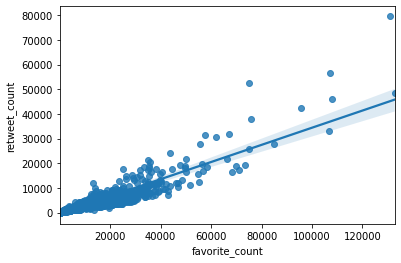

In [227]:
# Plot correlation between favorite_count and retweet_count
ax=sns.regplot(x='favorite_count',y='retweet_count', data=df_twitter_archive_master)

## Insight 1:  There is strong positive correlation between favorite_count and retweet_count.
**The hypothesis is popular tweets will have more retweets and favorite counts. Correlation between ‘retweet_count’ and ‘favorite_count’ was high r^2 is 0.9 . The plot above shows strong positive correlation. This indicates more the favorite count, more there will be retweets.

## Examine the top tweeted dogs

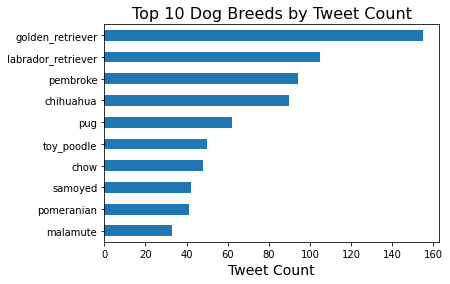

In [228]:
#Get value counts by breed column
ax = df_twitter_archive_master.true_dog.value_counts().head(10).plot(kind='barh')

plt.xlabel('Tweet Count', fontsize = 14)
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

## Insight 2: golden_retriever is most tweeted dog.
**This is America's favorite breed. Everone loves Golden Retriever.**

## How are Most dogs rated ?

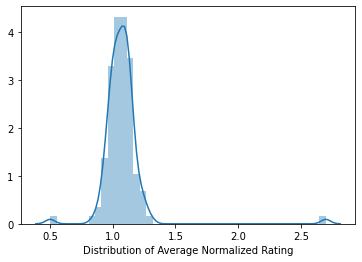

In [229]:
# How are most dogs rated
rating_by_breed=df_twitter_archive_master.groupby(['true_dog'])
rating_by_breed=rating_by_breed['rating_num'].mean().sort_values(ascending = False)

ax=sns.distplot(rating_by_breed, axlabel='Distribution of Average Normalized Rating')

## Insight 3:  Most Breeds Have an Average Rating between 1 and 1.2 ( 10/10 and 12/10). 
**People love dogs. So generally they tend to rate them high.**

## Distribution of tweets by Source

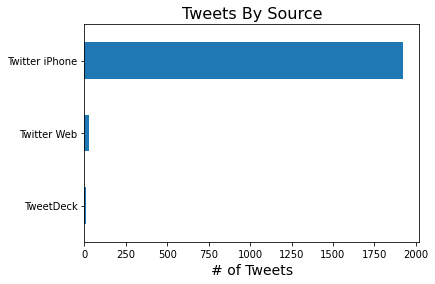

In [230]:
# View the tweets by source
top_source_ident=df_twitter_archive_master.source.value_counts().plot(kind='barh')

plt.xlabel('# of Tweets', fontsize = 14)
plt.title('Tweets By Source', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

## Insight 4:  Twitter iphone app is mostly used to tweet. 
**Majority of tweets come from iphone**

## Distribution of tweets by Dog Class

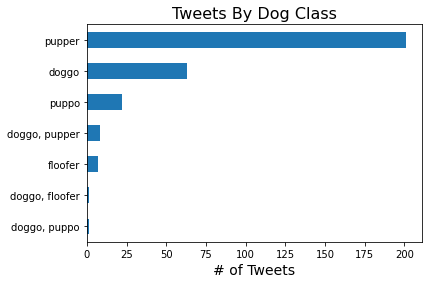

In [231]:
# View distribution of dog stages
ax=df_twitter_archive_master.dog_class.value_counts().plot(kind='barh')

plt.xlabel('# of Tweets', fontsize = 14)
plt.title('Tweets By Dog Class', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

## Insight 5:  Pupper is the most popular dog class 
**Majority of tweets come for pupper. Although dog stage is not poulated for all records. We have only 303 records so this may not be a absolute picture. However it does give us an idea of general distribution**